# Oasis Infobyte Data Science Internship

## Task 4

### EMAIL SPAM DETECTION USING MACHINE LEARNING

### BOMMISETTY SWATHI


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score

from imblearn.over_sampling import RandomOverSampler

In [12]:
data=pd.read_csv("D:/Email_spam_detection/spam.csv", encoding="latin-1")
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


**Exploring Data**

In [14]:
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [15]:
#Drop irrelevant columns and rename columns
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1, inplace=True)
data.rename(columns={'v1':'Target','v2':'Text'}, inplace=True)

In [16]:
data.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
data.groupby("Target").describe()

Text                                                               
       count unique                                                top freq
Target                                                                     
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

C:\Users\Harshit Bhavirisetty\AppData\Local\Temp\ipykernel_17480\1190703074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fg=sns.countplot(x=data["Target"], palette=cols)


Text(0, 0.5, 'Count')

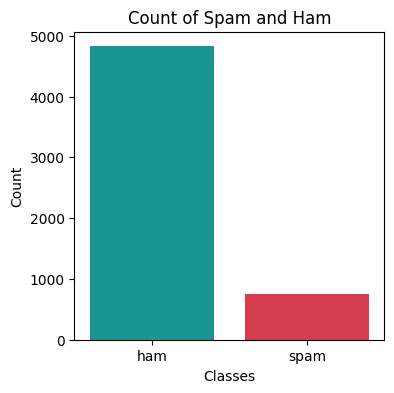

In [19]:
#palette
cols=["#05A8AA","#EF233C"]
plt.figure(figsize=(4,4))
fg=sns.countplot(x=data["Target"], palette=cols)
fg.set_title("Count of Spam and Ham")
fg.set_xlabel("Classes")
fg.set_ylabel("Count")

In [20]:
data["Text_Length"]=data["Text"].apply(len)

In [21]:
data.head()

,Target,Text,Text_Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


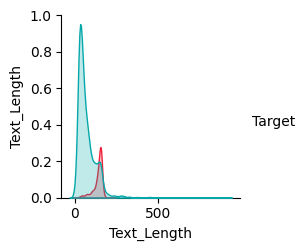

In [22]:
sns.pairplot(data=data,hue='Target', palette=cols)


Lengthy messages are more likely to be ham.

<Axes: ylabel='Text_Length'>

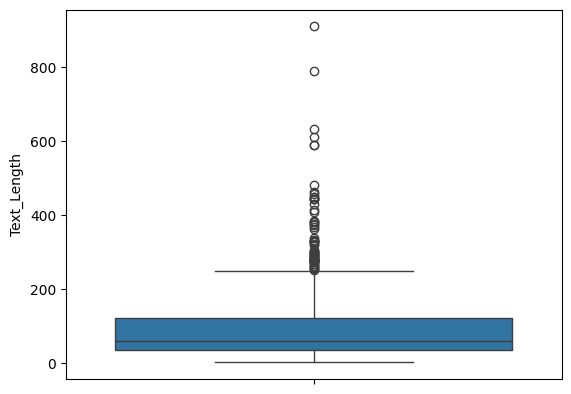

In [23]:
sns.boxplot(data["Text_Length"])

In [24]:
print(data[data["Text_Length"]>450].count())

Target         9
Text           9
Text_Length    9
dtype: int64


In [25]:
#remove outliers
data=data[data["Text_Length"]<450]

# **Data Preprocessing**
**1. Data Cleaning**


In [26]:
print(data["Text"][:10])

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
5    FreeMsg Hey there darling it's been 3 week's n...
6    Even my brother is not like to speak with me. ...
7    As per your request 'Melle Melle (Oru Minnamin...
8    WINNER!! As a valued network customer you have...
9    Had your mobile 11 months or more? U R entitle...
Name: Text, dtype: object


In [27]:
def clean(text):
    sms= re.sub('[^a-zA-Z]', " ", text)
    sms=sms.lower()
    
    #remove extra whitespaces
    sms= sms.split()
    sms= ' '.join(sms)
    return sms

data["Cleaned_text"]=data["Text"].apply(clean)
    

C:\Users\Harshit Bhavirisetty\AppData\Local\Temp\ipykernel_17480\3128674265.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Cleaned_text"]=data["Text"].apply(clean)


In [28]:
print(data["Cleaned_text"][:10])

0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in a wkly comp to win fa cup final ...
3          u dun say so early hor u c already then say
4    nah i don t think he goes to usf he lives arou...
5    freemsg hey there darling it s been week s now...
6    even my brother is not like to speak with me t...
7    as per your request melle melle oru minnaminun...
8    winner as a valued network customer you have b...
9    had your mobile months or more u r entitled to...
Name: Cleaned_text, dtype: object




**2. Tokenization**



In [29]:
data["Tokenized_text"]=data.apply(lambda row: nltk.word_tokenize(row["Cleaned_text"]), axis=1)

C:\Users\Harshit Bhavirisetty\AppData\Local\Temp\ipykernel_17480\2143718016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Tokenized_text"]=data.apply(lambda row: nltk.word_tokenize(row["Cleaned_text"]), axis=1)


In [30]:
print(data["Tokenized_text"][:10])

0    [go, until, jurong, point, crazy, available, o...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, in, a, wkly, comp, to, win, fa, ...
3    [u, dun, say, so, early, hor, u, c, already, t...
4    [nah, i, don, t, think, he, goes, to, usf, he,...
5    [freemsg, hey, there, darling, it, s, been, we...
6    [even, my, brother, is, not, like, to, speak, ...
7    [as, per, your, request, melle, melle, oru, mi...
8    [winner, as, a, valued, network, customer, you...
9    [had, your, mobile, months, or, more, u, r, en...
Name: Tokenized_text, dtype: object


**3. Remove Stopwords**



In [31]:
def remove_stopwords(text):
    stop_words=set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

data["Nostopword_text"] = data["Tokenized_text"].apply(remove_stopwords)

C:\Users\Harshit Bhavirisetty\AppData\Local\Temp\ipykernel_17480\1777826254.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Nostopword_text"] = data["Tokenized_text"].apply(remove_stopwords)


In [32]:
print(data["Nostopword_text"][:10])

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, wkly, comp, win, fa, cup, final,...
3        [u, dun, say, early, hor, u, c, already, say]
4       [nah, think, goes, usf, lives, around, though]
5    [freemsg, hey, darling, week, word, back, like...
6    [even, brother, like, speak, treat, like, aids...
7    [per, request, melle, melle, oru, minnaminungi...
8    [winner, valued, network, customer, selected, ...
9    [mobile, months, u, r, entitled, update, lates...
Name: Nostopword_text, dtype: object


**4. Stemming**



In [33]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Harshit
[nltk_data]     Bhavirisetty\AppData\Roaming\nltk_data...


True

In [34]:
stemmer = PorterStemmer()
def stem_word(text):
    stems = [stemmer.stem(word) for word in text]
    return stems
data["Stemmed_text"] = data["Nostopword_text"].apply(stem_word)

C:\Users\Harshit Bhavirisetty\AppData\Local\Temp\ipykernel_17480\2232693154.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Stemmed_text"] = data["Nostopword_text"].apply(stem_word)


In [35]:
print(data["Stemmed_text"][:10])

0    [go, jurong, point, crazi, avail, bugi, n, gre...
1                         [ok, lar, joke, wif, u, oni]
2    [free, entri, wkli, comp, win, fa, cup, final,...
3        [u, dun, say, earli, hor, u, c, alreadi, say]
4         [nah, think, goe, usf, live, around, though]
5    [freemsg, hey, darl, week, word, back, like, f...
6    [even, brother, like, speak, treat, like, aid,...
7    [per, request, mell, mell, oru, minnaminungint...
8    [winner, valu, network, custom, select, receiv...
9    [mobil, month, u, r, entitl, updat, latest, co...
Name: Stemmed_text, dtype: object


# Vectorization

TF-IDF in NLP stands for Term Frequency – Inverse document frequency. In NLP cleaned data needs to be converted into a numerical format where each word is represented by a matrix. This is also known as word embedding or Word vectorization.




In [36]:
corpus= []
for i in data["Stemmed_text"]:
    msg = ' '.join([row for row in i])
    corpus.append(msg)
    
corpus[:5]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though']

In [37]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()
X.dtype

dtype('float64')

In [38]:
label_encoder = LabelEncoder()
data["Target"] = label_encoder.fit_transform(data["Target"])

C:\Users\Harshit Bhavirisetty\AppData\Local\Temp\ipykernel_17480\275600629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Target"] = label_encoder.fit_transform(data["Target"])


**Class Imbalance Handling**

To perform oversampling, undersampling, or other balancing techniques to address class imbalance.

In [39]:
y = data["Target"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)


In [40]:
oversampler=RandomOverSampler(random_state=11)
X_train, y_train = oversampler.fit_resample(X_train, y_train)

C:\Users\Harshit Bhavirisetty\AppData\Local\Temp\ipykernel_17480\1504125972.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=resampled_df, palette=cols)


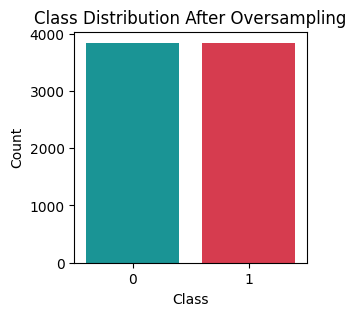

In [42]:
resampled_df = pd.DataFrame({'Target': y_train})

plt.figure(figsize=(3, 3))
sns.countplot(x='Target', data=resampled_df, palette=cols)
plt.title('Class Distribution After Oversampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

 **Model Building**

In [43]:
classifiers = [MultinomialNB(), 
               RandomForestClassifier(),
               KNeighborsClassifier(), 
               SVC()]
for cls in classifiers:
    cls.fit(X_train, y_train)

pipe_dict = {0: "NaiveBayes", 1: "RandomForest", 2: "KNeighbours",3: "SVC"}

In [44]:
for i, model in enumerate(classifiers):
    cv_score = cross_val_score(model, X_train,y_train,scoring="accuracy", cv=10)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

NaiveBayes: 0.980740 
RandomForest: 0.999610 
KNeighbours: 0.986728 
SVC: 0.999740 


# Model Evaluation

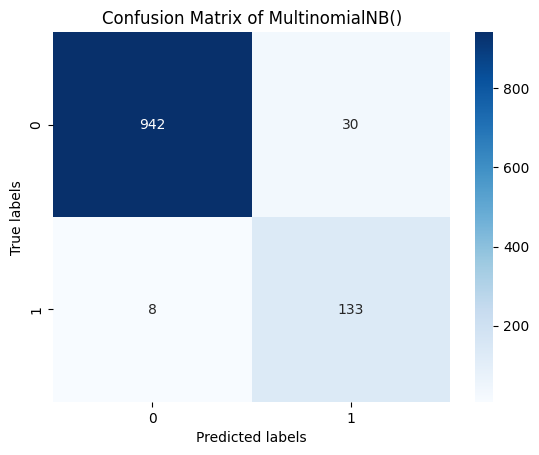

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       972
           1       0.82      0.94      0.87       141

    accuracy                           0.97      1113
   macro avg       0.90      0.96      0.93      1113
weighted avg       0.97      0.97      0.97      1113



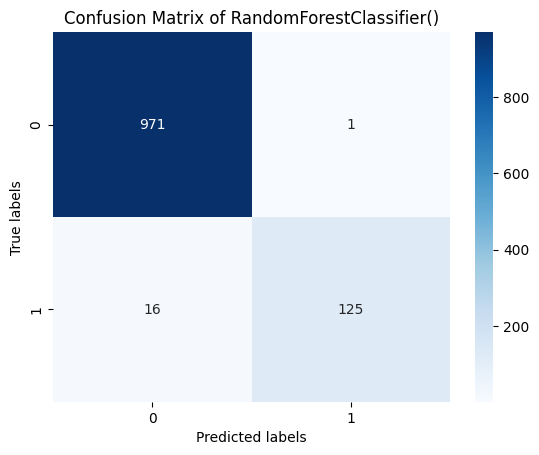

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       972
           1       0.99      0.89      0.94       141

    accuracy                           0.98      1113
   macro avg       0.99      0.94      0.96      1113
weighted avg       0.98      0.98      0.98      1113



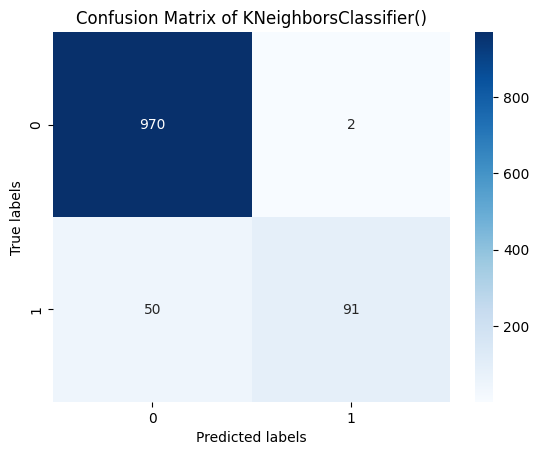

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.98      0.65      0.78       141

    accuracy                           0.95      1113
   macro avg       0.96      0.82      0.88      1113
weighted avg       0.95      0.95      0.95      1113



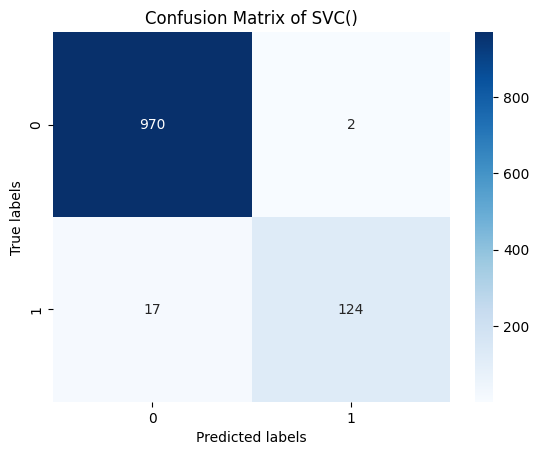

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       972
           1       0.98      0.88      0.93       141

    accuracy                           0.98      1113
   macro avg       0.98      0.94      0.96      1113
weighted avg       0.98      0.98      0.98      1113



In [45]:
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
sensitivity_list = []
specificity_list = []
fpr_list = []
fnr_list = []
npv_list = []
fdr_list = []
mcc_list = []

for cls in classifiers:
    
    y_pred = cls.predict(X_test)
    
    # Confusion Matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix of {cls}')
    plt.show()
    
    
    print(classification_report(y_test, y_pred))
    
    
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (fn + tp)
    f1 = 2 * (precision * recall) / (precision + recall)
    sensitivity = tp / (fn + tp)
    specificity = tn / (tn + fp)
    fpr = fp / (tn + fp)
    fnr = fn / (fn + tp)
    npv = tn / (tn + fn)
    fdr = fp / (fp + tp)
    mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
    
    
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)
    fpr_list.append(fpr)
    fnr_list.append(fnr)
    npv_list.append(npv)
    fdr_list.append(fdr)
    mcc_list.append(mcc)

metrics_df = pd.DataFrame({
    'Model': [pipe_dict[i] for i in range(len(pipe_dict))],
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1-Measure': f1_list,
    'Sensitivity': sensitivity_list,
    'Specificity': specificity_list,
    'FPR': fpr_list,
    'FNR': fnr_list,
    'NPV': npv_list,
    'FDR': fdr_list,
    'MCC': mcc_list
})


In [46]:
metrics_df.transpose()

,0,1,2,3
Model,NaiveBayes,RandomForest,KNeighbours,SVC
Accuracy,0.965858,0.984726,0.953279,0.982929
Precision,0.815951,0.992063,0.978495,0.984127
Recall,0.943262,0.886525,0.64539,0.879433
F1-Measure,0.875,0.93633,0.777778,0.928839
Sensitivity,0.943262,0.886525,0.64539,0.879433
Specificity,0.969136,0.998971,0.997942,0.997942
FPR,0.030864,0.001029,0.002058,0.002058
FNR,0.056738,0.113475,0.35461,0.120567
NPV,0.991579,0.983789,0.95098,0.982776
